In [1]:
from keras.layers import SimpleRNN, Embedding, Dense, LSTM
from keras.models import Sequential

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns; sns.set()

import warnings
warnings.filterwarnings(action='ignore')

In [2]:
data = pd.read_csv("./spam text.csv")

In [3]:
data.head()



,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [5]:
data.groupby('Category').describe()

Message                                                            \
           count unique                                                top   
Category                                                                     
ham         4825   4516                             Sorry, I'll call later   
spam         747    641  Please call our customer service representativ...   

               
         freq  
Category       
ham        30  
spam        4

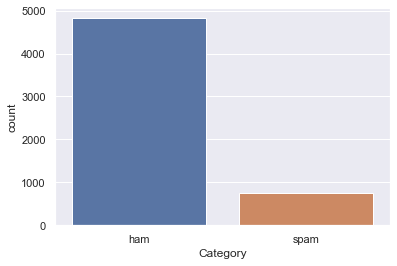

In [6]:
sns.countplot(x='Category', data=data)

In [7]:
data['length'] = data['Message'].apply(len)
data.head()

,Category,Message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


array([<matplotlib.axes._subplots.AxesSubplot object at 0x13ae2d730>,
      dtype=object)

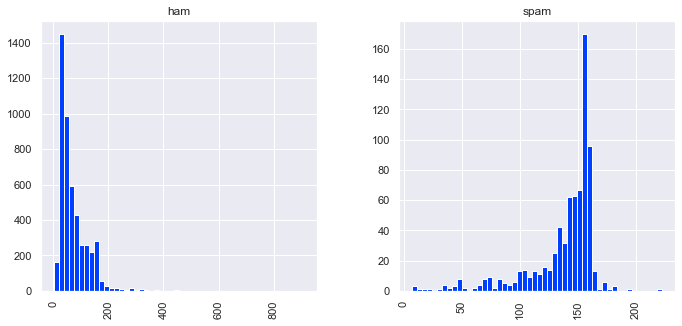

In [8]:
plt.rcParams['patch.force_edgecolor'] = True
plt.style.use('seaborn-bright')
data.hist(column='length', by='Category', bins=50,figsize=(11,5))

In [9]:
data_ham = data.drop(data.index[np.where(data['Category'] == 'spam')])
data_ham = data_ham.reset_index(drop=True)
data_spam = data.drop(data.index[np.where(data['Category'] == 'ham')])
data_spam = data_spam.reset_index(drop=True)

(0.0, 200.0)

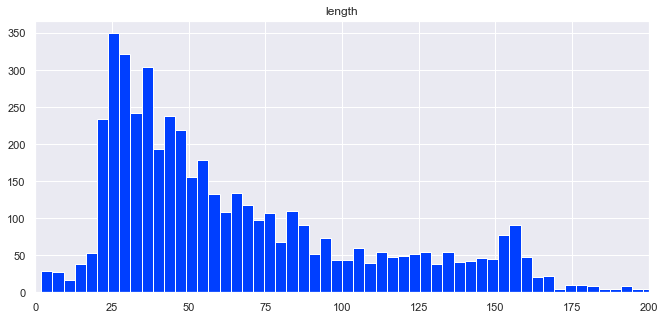

In [10]:
data_ham.hist(column='length', bins=250,figsize=(11,5))
plt.xlim(0, 200)

(0.0, 200.0)

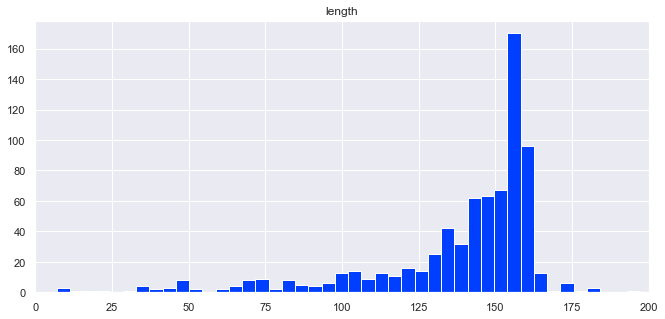

In [11]:
data_spam.hist(column='length', bins=50,figsize=(11,5))
plt.xlim(0, 200)

1. RNN

* append 과정 (0과 1로 카테고리별 값 부여하는 과정)

In [12]:
texts = [] #
labels = [] #
for i, label in enumerate(data['Category']):
    texts.append(data['Message'][i])
    if label == 'ham':
        labels.append(0)
    else:
        labels.append(1)

texts = np.asarray(texts)
labels = np.asarray(labels)


print("number of texts :" , len(texts))
print("number of labels: ", len(labels))

number of texts : 5572
number of labels:  5572


In [13]:
texts

array(['Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...',
       'Ok lar... Joking wif u oni...',
       "Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's",
       ..., 'Pity, * was in mood for that. So...any other suggestions?',
       "The guy did some bitching but I acted like i'd be interested in buying something else next week and he gave it to us for free",
       'Rofl. Its true to its name'], dtype='<U910')

In [14]:
len(texts)

5572

In [15]:
## from keras.layers import SimpleRNN, Embedding, Dense, LSTM
## from keras.models import Sequential

from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

# number of words used as features (=전체 메일 문서에서 나오는 단어의 총 수가 max_features 넘지 않게 설정 (근데 후에 확인해볼 때 9천개로 어차피 넘지는 않음))
max_features = 10000
# cut off the words after seeing 500 words in each document(email) (=하나의 메일문서에서 나오는 단어가 maxlen은 넘지 않게 설정해주는 것)
maxlen = 500


# we will use 80% of data as training, 20% as validation data
training_samples = int(5572 * .8)
validation_samples = int(5572 - training_samples)
# sanity check
print(len(texts) == (training_samples + validation_samples))
print("The number of training {0}, validation {1} ".format(training_samples, validation_samples))

tokenizer = Tokenizer()
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

word_index = tokenizer.word_index
print("Found {0} unique words: ".format(len(word_index))) # %d
print("Found %d unique words: " %(len(word_index)))

data = pad_sequences(sequences, maxlen=maxlen)

print("data shape: ", data.shape)

np.random.seed(42)
# shuffle data =train test 라이브러리
indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]


texts_train = data[:training_samples]
y_train = labels[:training_samples]
texts_test = data[training_samples:]
y_test = labels[training_samples:]

True
The number of training 4457, validation 1115 
Found 9004 unique words: 
Found 9004 unique words: 
data shape:  (5572, 500)


In [16]:
sequences

[[49,
  471,
  4426,
  840,
  755,
  658,
  65,
  8,
  1327,
  88,
  123,
  351,
  1328,
  148,
  2993,
  1329,
  67,
  58,
  4427,
  144],
 [46, 336, 1499, 472, 6, 1940],
 [47,
  489,
  8,
  19,
  4,
  796,
  901,
  2,
  175,
  1941,
  1105,
  659,
  1942,
  2331,
  261,
  2332,
  71,
  1941,
  2,
  1943,
  2,
  337,
  489,
  555,
  960,
  73,
  390,
  179,
  660,
  391,
  2994],
 [6, 247, 150, 23, 381, 2995, 6, 139, 153, 57, 150],
 [1024, 1, 98, 108, 69, 490, 2, 961, 69, 1944, 221, 112, 473],
 [797,
  128,
  67,
  1689,
  145,
  109,
  158,
  2996,
  21,
  7,
  38,
  338,
  89,
  902,
  55,
  116,
  413,
  3,
  44,
  12,
  14,
  85,
  1945,
  46,
  365,
  960,
  4428,
  2,
  68,
  323,
  234,
  2,
  2997],
 [210, 11, 633, 9, 25, 55, 2, 382, 36, 10, 110, 718, 10, 55, 4429, 4430],
 [72,
  235,
  13,
  1204,
  2333,
  2334,
  1946,
  2335,
  2336,
  2337,
  798,
  118,
  109,
  609,
  72,
  13,
  1025,
  12,
  51,
  1690,
  841,
  392,
  2,
  1106,
  13,
  248,
  1025],
 [719,
  72,
  4

In [17]:
data

array([[   0,    0,    0, ...,  274, 1902,    6],
       [   0,    0,    0, ...,  448,   12,  996],
       [   0,    0,    0, ...,   19,   56, 1580],
       ...,
       [   0,    0,    0, ...,  281,   30, 2522],
       [   0,    0,    0, ..., 1108,    1,  256],
       [   0,    0,    0, ...,    9, 3390, 1182]], dtype=int32)

In [18]:
model = Sequential()
model.add(Embedding(max_features, 32))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history_rnn = model.fit(texts_train, y_train, epochs=10, batch_size=60, validation_split=0.2)

Epoch 1/10
60/60 [==============================] - 12s 203ms/step - loss: 0.4147 - acc: 0.8690 - val_loss: 0.1867 - val_acc: 0.9619
Epoch 2/10
60/60 [==============================] - 11s 183ms/step - loss: 0.1145 - acc: 0.9742 - val_loss: 0.0892 - val_acc: 0.9709
Epoch 3/10
60/60 [==============================] - 12s 203ms/step - loss: 0.0627 - acc: 0.9835 - val_loss: 0.0938 - val_acc: 0.9720
Epoch 4/10
60/60 [==============================] - 11s 188ms/step - loss: 0.0376 - acc: 0.9879 - val_loss: 0.0856 - val_acc: 0.9697
Epoch 5/10
60/60 [==============================] - 13s 214ms/step - loss: 0.0269 - acc: 0.9927 - val_loss: 0.4172 - val_acc: 0.8229
Epoch 6/10
60/60 [==============================] - 12s 195ms/step - loss: 0.1422 - acc: 0.9433 - val_loss: 0.1627 - val_acc: 0.9406
Epoch 7/10
60/60 [==============================] - 10s 169ms/step - loss: 0.0500 - acc: 0.9840 - val_loss: 0.1172 - val_acc: 0.9630
Epoch 8/10
60/60 [==============================] - 11s 176ms/step - 

* embedding layer
-> 주로 텍스트데이터가 입력일 때 자주 사용됨.
(RNN이 텍스트데이터가 자주 사용되서, RNN의 입력층으로 자주 나온다)

+)
* CNN에서 벡터화를 위해 '원핫인코딩' 사용한 것과 똑같은 역할을 함
 = RNN에서는 벡터화 역할을 '임베딩 층'이 함
 https://wikidocs.net/32105
 
 
 +)) '원핫인코딩'을 해주기 전, 출력노드수는 1 !
 ex) ham, spam으로 카테고리가 2개인 주제 -> y출력노드수 1
 ex) 카테고리 3개인 주제 -> y출력노드수 1
 ex) 카테고리 3개인데 + 원핫인코딩 해준 주제 -> y출력노드수 3
                                                                 ( [0,0,1], [0,1,0], [1,0,0] 이런형태로 y_train 예측값이 나올테니까)


* 이진분류 -> <원핫인코딩> 해줄 필요가 없음 (이미 0, 1. ->2개밖에 없기 때문에)
  다중분류 -> 일 때 <원핫인코딩>을 해준다 !!!



In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 32)          320000    
_________________________________________________________________
simple_rnn (SimpleRNN)       (None, 32)                2080      
_________________________________________________________________
dense (Dense)                (None, 1)                 33        
Total params: 322,113
Trainable params: 322,113
Non-trainable params: 0
_________________________________________________________________


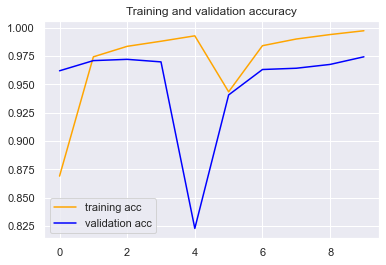

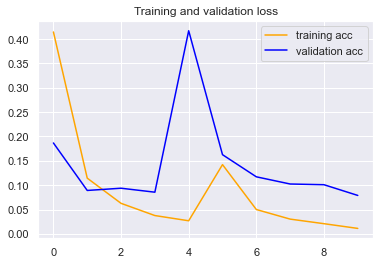

In [20]:
acc = history_rnn.history['acc']
val_acc = history_rnn.history['val_acc']
loss = history_rnn.history['loss']
val_loss = history_rnn.history['val_loss']
epochs = range(len(acc))
plt.plot(epochs, acc, '-', color='orange', label='training acc')
plt.plot(epochs, val_acc, '-', color='blue', label='validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.show()

plt.plot(epochs, loss, '-', color='orange', label='training acc')
plt.plot(epochs, val_loss,  '-', color='blue', label='validation acc')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [21]:
pred = model.predict_classes(texts_test)
acc = model.evaluate(texts_test, y_test)
proba_rnn = model.predict_proba(texts_test)
from sklearn.metrics import confusion_matrix
print("Test loss is {0:.2f} accuracy is {1:.2f}  ".format(acc[0],acc[1]))
print(confusion_matrix(pred, y_test)) #

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
35/35 [==============================] - 1s 29ms/step - loss: 0.0861 - acc: 0.9776
Instructions for updating:
Please use `model.predict()` instead.
Test loss is 0.09 accuracy is 0.98  
[[958  22]
 [  3 132]]


2. LTSM

In [22]:
model = Sequential()
model.add(Embedding(max_features, 32))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history_ltsm = model.fit(texts_train, y_train, epochs=10, batch_size=60, validation_split=0.2)

Epoch 1/10
60/60 [==============================] - 22s 361ms/step - loss: 0.2885 - acc: 0.8909 - val_loss: 0.1691 - val_acc: 0.9776
Epoch 2/10
60/60 [==============================] - 18s 304ms/step - loss: 0.1002 - acc: 0.9798 - val_loss: 0.0670 - val_acc: 0.9809
Epoch 3/10
60/60 [==============================] - 18s 296ms/step - loss: 0.0505 - acc: 0.9902 - val_loss: 0.0476 - val_acc: 0.9832
Epoch 4/10
60/60 [==============================] - 22s 375ms/step - loss: 0.0320 - acc: 0.9924 - val_loss: 0.0551 - val_acc: 0.9877
Epoch 5/10
60/60 [==============================] - 19s 315ms/step - loss: 0.0203 - acc: 0.9952 - val_loss: 0.0478 - val_acc: 0.9843
Epoch 6/10
60/60 [==============================] - 18s 307ms/step - loss: 0.0144 - acc: 0.9966 - val_loss: 0.0457 - val_acc: 0.9865
Epoch 7/10
60/60 [==============================] - 20s 325ms/step - loss: 0.0113 - acc: 0.9975 - val_loss: 0.0472 - val_acc: 0.9877
Epoch 8/10
60/60 [==============================] - 19s 321ms/step - 

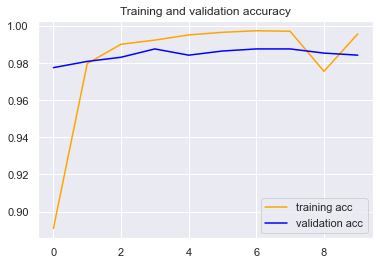

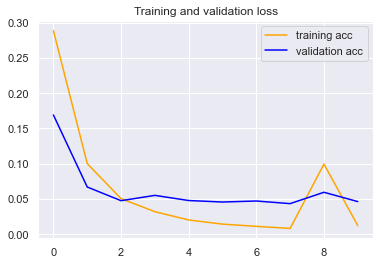

In [23]:
acc = history_ltsm.history['acc']
val_acc = history_ltsm.history['val_acc']
loss = history_ltsm.history['loss']
val_loss = history_ltsm.history['val_loss']
epochs = range(len(acc))
plt.plot(epochs, acc, '-', color='orange', label='training acc')
plt.plot(epochs, val_acc, '-', color='blue', label='validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.show()

plt.plot(epochs, loss, '-', color='orange', label='training acc')
plt.plot(epochs, val_loss,  '-', color='blue', label='validation acc')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [24]:
pred = model.predict_classes(texts_test)
acc = model.evaluate(texts_test, y_test)
proba_ltsm = model.predict_proba(texts_test)
from sklearn.metrics import confusion_matrix
print("Test loss is {0:.2f} accuracy is {1:.2f}  ".format(acc[0],acc[1]))
print(confusion_matrix(pred, y_test))

35/35 [==============================] - 2s 55ms/step - loss: 0.0731 - acc: 0.9785
Test loss is 0.07 accuracy is 0.98  
[[953  16]
 [  8 138]]


Ensemble method (combining RNN and LTSM)

In [25]:
ensemble_proba = 0.3 * proba_rnn + 0.7 * proba_ltsm

In [26]:
ensemble_proba[:5]

array([[1.0670066e-03],
       [4.5082308e-04],
       [2.9878115e-04],
       [9.2065689e-05],
       [9.0460671e-05]], dtype=float32)

In [27]:
ensemble_class = np.array([1 if i >= 0.5 else 0 for i in ensemble_proba])

In [28]:
ensemble_class[:5]

array([0, 0, 0, 0, 0])

In [29]:
print(confusion_matrix(pred, y_test))

[[953  16]
 [  8 138]]


How to improve further?
Use ensemble method with logistic regression implemented above or other classifiers, which should imporve accuracy

In [30]:
y_train[5:20]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0])